In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Navigate to the folder where the 'ml-depth-pro-main' is located
import os
repo_path = '/content/drive/My Drive/Colab Notebooks/' #ml-depth-pro-main
os.chdir(repo_path)

# Check if you are in the right directory
!ls


Mounted at /content/drive
 13415492_2024-11-25_11-09-07.txt   example.txt		   IMG_9377-preview.txt
 345_2021-11-17_15-26-26.txt	    fineTuneApp.ipynb	   IMG_9378-preview.txt
'Adroid3(former).txt'		    firstOpenAi.ipynb	   IMG_9379-preview.HEIC.txt
'Android1(new).txt'		    frontcam.txt	   iphone16.txt
'Android2(former).txt'		    IMG_0307.txt	   ml-depth-pro-main
 Chatbot			    IMG_0336.txt	   Scaling_picture.ipynb
 checkpoints			    IMG_0345.txt	  'Screenshot 2025-01-09 at 6.05.56 PM.txt'
 coin.txt			    IMG_0436.txt	   Untitled
'Copy of Welcome To Colab'	    IMG_0445.txt	   Untitled.ipynb
 example2.txt			    IMG_0451.txt	   wound1.txt
 example3.txt			    IMG_0460.txt	   wound2.txt
 example5.txt			    IMG_9374-preview.txt
 example6.txt			    IMG_9375-preview.txt


In [ ]:
'''
install requirements
'''

!pip install torch torchvision opencv-python matplotlib
!pip install pillow-heif


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
# Add the ml-depth-pro-main repo to the Python path
import sys
sys.path.append(os.path.join(repo_path, 'ml-depth-pro-main'))

# Check if we can import any of the repo's modules (for example, 'depth')
# Try importing some module from the repo


from src import depth_pro
from src.depth_pro import *
from src.depth_pro.utils import *
from src.depth_pro.eval.boundary_metrics import *





In [ ]:
# List files in the ml-depth-pro-main folder
!ls /content/drive/My\ Drive/Colab\ Notebooks/ml-depth-pro-main/src/depth_pro



cli  depth_pro.py  eval  __init__.py  network  __pycache__  utils.py


In [ ]:
!source /content/drive/My\ Drive/Colab\ Notebooks/ml-depth-pro-main/get_pretrained_models.sh


--2025-02-20 17:31:04--  https://ml-site.cdn-apple.com/models/depth-pro/depth_pro.pt
Resolving ml-site.cdn-apple.com (ml-site.cdn-apple.com)... 17.253.97.206, 17.253.97.204, 2620:149:a10:f000::1, ...
Connecting to ml-site.cdn-apple.com (ml-site.cdn-apple.com)|17.253.97.206|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1904446787 (1.8G) [binary/octet-stream]
Saving to: ‘checkpoints/depth_pro.pt.95’

depth_pro.pt.95     100%[===================>]   1.77G  15.1MB/s    in 84s     

2025-02-20 17:32:28 (21.7 MB/s) - ‘checkpoints/depth_pro.pt.95’ saved [1904446787/1904446787]



In [ ]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import torch
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# from src import depth_pro
from src.depth_pro.utils import load_rgb # added

# Load model and preprocessing transform
model, transform = depth_pro.create_model_and_transforms()
model.eval()

image_path = '/content/drive/My Drive/Colab Notebooks/ml-depth-pro-main/data/Android2(former).jpg'

# Load and preprocess an image.
image, _, f_px = load_rgb(image_path)


/content/drive/My Drive/Colab Notebooks/ml-depth-pro-main/src/depth_pro/depth_pro.py:135: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(config.checkp

In [ ]:
image = transform(image)# transformed image

In [ ]:
# ... your other code ...

# Load the image using PIL
img_pil = Image.open(image_path)

# Now call extract_exif with the PIL Image object
extract_exif(img_pil)

{'ExifVersion': b'0220',
 'ShutterSpeedValue': 0.008333333333333333,
 'ApertureValue': 1.53,
 'DateTimeOriginal': '2025:01:15 16:14:24',
 'DateTimeDigitized': '2025:01:15 16:14:24',
 'BrightnessValue': 2.96,
 'ExposureBiasValue': 0.0,
 'MaxApertureValue': 1.53,
 'MeteringMode': 2,
 'Flash': 0,
 'FocalLength': 6.3,
 'ColorSpace': 65535,
 'ExifImageWidth': 4000,
 'DigitalZoomRatio': 1.0,
 'FocalLengthIn35mmFilm': 23,
 'SceneCaptureType': 0,
 'OffsetTime': '-05:00',
 'OffsetTimeOriginal': '-05:00',
 'SubsecTime': '798',
 'SubsecTimeOriginal': '798',
 'SubsecTimeDigitized': '798',
 'ExifImageHeight': 3000,
 'ExposureTime': 0.008333333333333333,
 'FNumber': 1.7,
 'ImageUniqueID': 'HK0XLQE00SM',
 'ExposureProgram': 2,
 'ISOSpeedRatings': 160,
 'ExposureMode': 0,
 'FlashPixVersion': b'0100',
 'WhiteBalance': 0,
 'ImageWidth': 4000,
 'ImageLength': 3000,
 'ResolutionUnit': 2,
 'ExifIFD': 234,
 'Make': 'samsung',
 'Model': 'Galaxy S24 Ultra',
 'Software': 'S928USQS4AXL2',
 'Orientation': 1,
 'D

In [ ]:
#f_px = fpx_from_f35(4000.0,3000.0,55)

In [ ]:
# Run inference.
prediction = model.infer(image, f_px=f_px)
depth = prediction["depth"]  # Depth in [m].
focallength_px = prediction["focallength_px"]  # Focal length in pixels.

In [ ]:
depth

tensor([[0.3022, 0.2991, 0.2844,  ..., 0.2697, 0.2884, 0.2924],
        [0.2926, 0.2905, 0.2803,  ..., 0.2633, 0.2763, 0.2790],
        [0.2759, 0.2754, 0.2727,  ..., 0.2519, 0.2558, 0.2566],
        ...,
        [0.2859, 0.2857, 0.2848,  ..., 0.2426, 0.2434, 0.2436],
        [0.2917, 0.2911, 0.2881,  ..., 0.2465, 0.2507, 0.2516],
        [0.2949, 0.2941, 0.2898,  ..., 0.2486, 0.2547, 0.2559]])

In [ ]:
import numpy as np

threshold = depth.mean().item()   # Threshold to identify object regions
object_mask = depth > threshold  # Binary mask where condition is True

# Find pixel coordinates
object_pixels = np.argwhere(object_mask)


In [ ]:
from src.depth_pro.eval.boundary_metrics import *
import numpy as np

# Convert the depth tensor to a NumPy array
depth_np = depth.cpu().numpy()  # Assuming depth is a PyTorch tensor
horizontal_mask = nms_horizontal(depth_np, threshold)
vertical_mask = nms_vertical(depth_np, threshold)
final_mask = horizontal_mask & vertical_mask

In [ ]:
focallength_px

2657.9384402458895

In [ ]:
# Normalizing to create a ratio matrix
ratio_matrix = depth / depth.max()
ratio_matrix

tensor([[1.0000, 0.9898, 0.9412,  ..., 0.8926, 0.9544, 0.9676],
        [0.9683, 0.9613, 0.9275,  ..., 0.8713, 0.9143, 0.9233],
        [0.9129, 0.9112, 0.9023,  ..., 0.8334, 0.8464, 0.8490],
        ...,
        [0.9460, 0.9454, 0.9423,  ..., 0.8027, 0.8056, 0.8061],
        [0.9654, 0.9633, 0.9532,  ..., 0.8157, 0.8296, 0.8324],
        [0.9758, 0.9730, 0.9590,  ..., 0.8226, 0.8427, 0.8468]])

In [ ]:
inverse_depth = 1 / depth
# Visualize inverse depth instead of depth, clipped to [0.1m;250m] range for better visualization.
max_invdepth_vizu = min(inverse_depth.max(), 1 / 0.1)
min_invdepth_vizu = max(1 / 250, inverse_depth.min())
inverse_depth_normalized = (inverse_depth - min_invdepth_vizu) / (max_invdepth_vizu - min_invdepth_vizu)


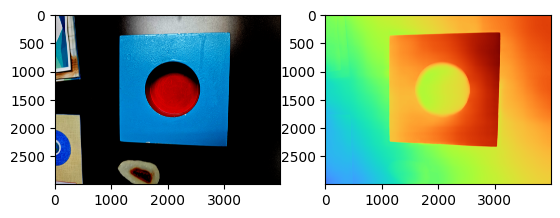

In [ ]:
fig, (ax_rgb, ax_disp) = plt.subplots(1, 2)
# Convert the PyTorch tensor to a NumPy array and permute the dimensions
image_np = image.cpu().numpy()  # Move to CPU if using CUDA
image_np = np.transpose(image_np, (1, 2, 0))  # Change to (H, W, C)

ax_rgb.imshow(image_np)
ax_disp.imshow(inverse_depth_normalized, cmap="turbo")
fig.canvas.draw()
fig.canvas.flush_events()
plt.show(block=True)

In [ ]:
saving_path = '/content/drive/My Drive/Colab Notebooks/Android2(former).txt'

In [ ]:
import numpy as np

def depth_to_3d(depth_map: np.ndarray, focallength_px) -> np.ndarray:
    """
    Convert a depth map to a 3D point cloud.

    Args:
    ----
        depth_map (np.ndarray): 2D depth map.
        focallength_px : Focal length in pixels.

    Returns:
    -------
        np.ndarray: 3D points as (N, 3) array.
    """
    # Convert the depth map to a NumPy array if it's a PyTorch tensor
    if isinstance(depth_map, torch.Tensor):
        depth_map = depth_map.cpu().numpy()

    h, w = depth_map.shape
    # Assuming fx and fy are equal to focallength_px
    fx = focallength_px.item()  # Get the scalar value from the tensor
    fy = focallength_px.item()  # Get the scalar value from the tensor
    # Assuming principal point is at the center of the image
    camera_intrinsics = {
        "cx": w/2 ,
        "cy": h/2
    }
    cx = camera_intrinsics["cx"]
    cy = camera_intrinsics["cy"]
    # Generate pixel grid
    u, v = np.meshgrid(np.arange(w), np.arange(h))

    # Convert depth map to 3D points
    Z = depth_map
    X = (u - cx) * Z / fx
    Y = (v - cy) * Z / fy

    # Combine into (N, 3) array
    points = np.stack((X, Y, Z), axis=-1).reshape(-1, 3)
    return points

In [ ]:
def save_points_to_txt(points: np.ndarray, file_path: str) -> None:
    """
    Save 3D points to a text file.

    Args:
    ----
        points (np.ndarray): 3D points as an (N, 3) array.
        file_path (str): Path to save the text file.

    Returns:
    -------
        None
    """
    # Save the points with header "x y z" for clarity
    np.savetxt(file_path, points, fmt="%.6f", header="x y z", comments="")

In [ ]:
points = depth_to_3d(depth, focallength_px)
points

array([[-0.22740425, -0.17055319,  0.30221325],
       [-0.22496806, -0.16881045,  0.29912519],
       [-0.21381656, -0.16052294,  0.28444007],
       ...,
       [ 0.18678212,  0.1402035 ,  0.24860059],
       [ 0.19144467,  0.14363141,  0.25467876],
       [ 0.19247089,  0.1443291 ,  0.25591585]])

In [ ]:
save_points_to_txt(points,saving_path)